In [3]:
from data_load import UnderwaterDataset  

train_dataset = UnderwaterDataset(
    img_dir="/Users/anirudhmamgain/Desktop/Object_detection_from_scratch/Dataset/train/images",
    label_dir="/Users/anirudhmamgain/Desktop/Object_detection_from_scratch/Dataset/train/labels"
)

val_dataset = UnderwaterDataset(
    img_dir="/Users/anirudhmamgain/Desktop/Object_detection_from_scratch/Dataset/valid/images",
    label_dir="/Users/anirudhmamgain/Desktop/Object_detection_from_scratch/Dataset/valid/labels"
)

test_dataset = UnderwaterDataset(
    img_dir="/Users/anirudhmamgain/Desktop/Object_detection_from_scratch/Dataset/test/images",
    label_dir="/Users/anirudhmamgain/Desktop/Object_detection_from_scratch/Dataset/test/labels"
)

print("Train samples :", len(train_dataset))
print("Validation samples :", len(val_dataset))
print("Test samples :", len(test_dataset))


Train samples : 448
Validation samples : 127
Test samples : 63


In [4]:
import os
from collections import Counter

CLASS_NAMES = [
    'fish', 'jellyfish', 'penguin',
    'puffin', 'shark', 'starfish', 'stingray'
]

def get_class_distribution(label_dir):
    counter = Counter()

    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        if not label_file.endswith(".txt"):
            continue

        with open(label_path, "r") as f:
            for line in f.readlines():
                cls_id = int(line.strip().split()[0])
                counter[CLASS_NAMES[cls_id]] += 1

    return counter


train_dist = get_class_distribution("/Users/anirudhmamgain/Desktop/Object_detection_from_scratch/Dataset/train/labels")
val_dist   = get_class_distribution("/Users/anirudhmamgain/Desktop/Object_detection_from_scratch/Dataset/valid/labels")
test_dist  = get_class_distribution("/Users/anirudhmamgain/Desktop/Object_detection_from_scratch/Dataset/test/labels")

print("Train distribution:", train_dist)
print("Validation distribution:", val_dist)
print("Test distribution:", test_dist)


Train distribution: Counter({'fish': 1961, 'jellyfish': 385, 'penguin': 330, 'shark': 259, 'puffin': 175, 'stingray': 136, 'starfish': 78})
Validation distribution: Counter({'fish': 459, 'jellyfish': 155, 'penguin': 104, 'puffin': 74, 'shark': 57, 'stingray': 33, 'starfish': 27})
Test distribution: Counter({'fish': 249, 'jellyfish': 154, 'penguin': 82, 'shark': 38, 'puffin': 35, 'stingray': 15, 'starfish': 11})


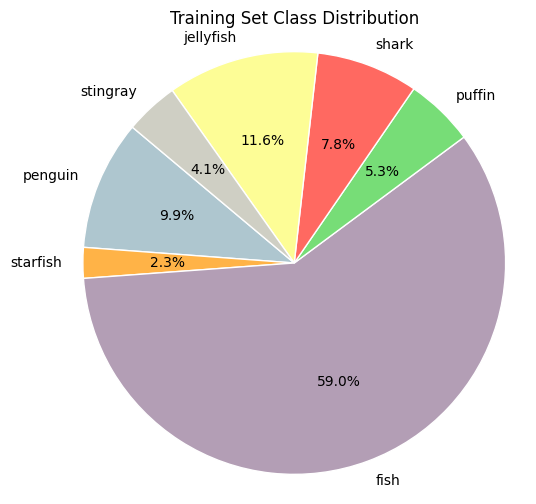

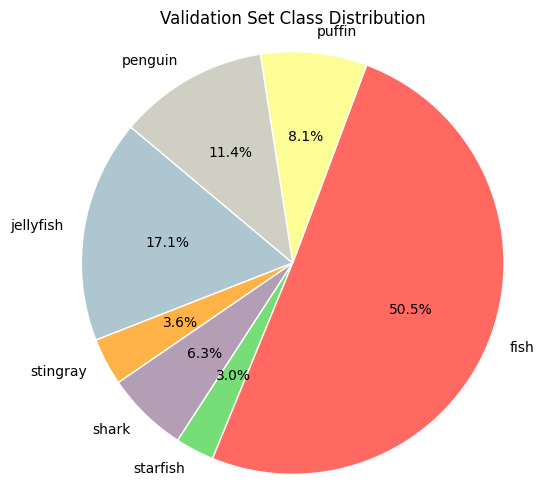

In [9]:
import matplotlib.pyplot as plt

PASTEL_COLORS = [
    "#AEC6CF",  # pastel blue
    "#FFB347",  # pastel orange
    "#B39EB5",  # pastel purple
    "#77DD77",  # pastel green
    "#FF6961",  # pastel red
    "#FDFD96",  # pastel yellow
    "#CFCFC4"   # pastel grey
]

def plot_pie(dist, title):
    labels = list(dist.keys())
    sizes = list(dist.values())

    plt.figure(figsize=(6, 6))
    plt.pie(
        sizes,
        labels=labels,
        colors=PASTEL_COLORS[:len(labels)],
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={"edgecolor": "white"}
    )
    plt.title(title)
    plt.axis('equal')
    plt.show()


plot_pie(train_dist, "Training Set Class Distribution")
plot_pie(val_dist, "Validation Set Class Distribution")


In [5]:
import os
import cv2
import matplotlib.pyplot as plt

CLASS_NAMES = [
    'fish', 'jellyfish', 'penguin',
    'puffin', 'shark', 'starfish', 'stingray'
]

def visualize_sample(img_dir, label_dir, index=0):
    img_files = sorted(os.listdir(img_dir))
    img_name = img_files[index]

    img_path = os.path.join(img_dir, img_name)
    label_path = os.path.join(
        label_dir,
        img_name.replace(".jpg", ".txt").replace(".png", ".txt")
    )

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                cls, x, y, bw, bh = map(float, line.strip().split())

                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)

                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(
                    img,
                    CLASS_NAMES[int(cls)],
                    (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5,
                    (255, 0, 0),
                    2
                )

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


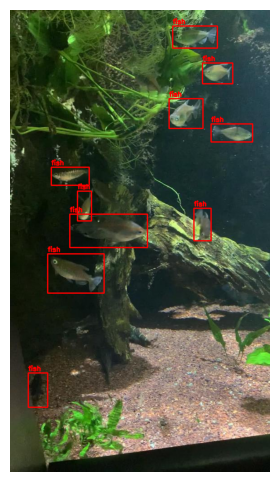

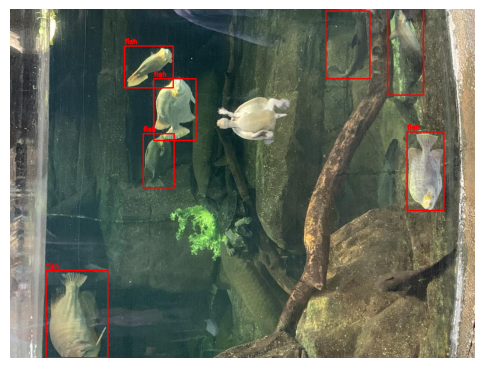

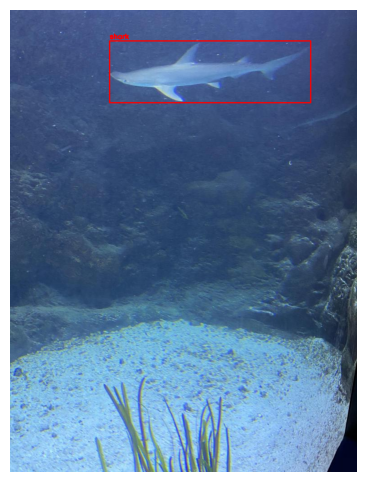

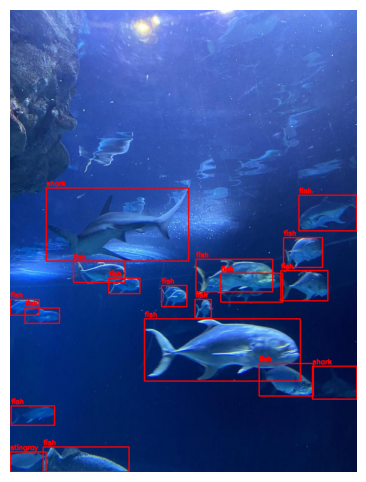

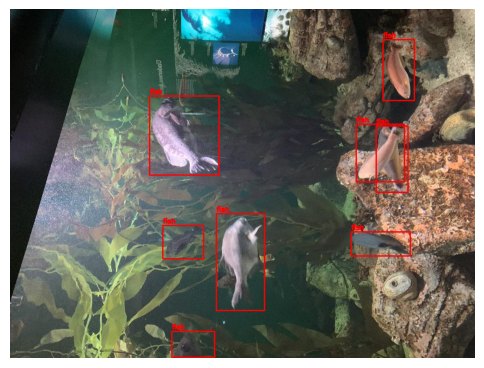

In [7]:
import random

num_samples = 5

img_dir = "/Users/anirudhmamgain/Desktop/Object_detection_from_scratch/Dataset/train/images"
label_dir = "/Users/anirudhmamgain/Desktop/Object_detection_from_scratch/Dataset/train/labels"

img_files = sorted(os.listdir(img_dir))
total_images = len(img_files)

for _ in range(num_samples):
    idx = random.randint(0, total_images - 1)
    visualize_sample(
        img_dir=img_dir,
        label_dir=label_dir,
        index=idx
    )
